> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Writing a Data Scientist Blog Post

# Investigation on gasoline pricing in germany

<img src = "img.jpg">


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

Since the prices for gasoline seem to have reached a new all-time high, I became interested in further investigate this topic. In germany, since August 2013 gas stations are obligated to inform the department for market transparency (MTS-K) about the pricing of their Super E5, Super E10 and Diesel fuels.

Tankerkönig.de collects and provides all the data collected via a free to use API. In the following we will be looking at data on both the fuel stations and prices from 2014 onward. To get a better understanding of todays fuel prices, we will investigate the development of the prices in general and have a closer look on when and where it might be best to fuel up.

In [6]:
# Import statements for all of the packages that I
# plan to use.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as md
import shapely
import geopandas as gpd
import os
import glob
from datetime import datetime 
from pathlib import Path
import bz2


%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling


#### Prices
In the following we will load all data regarding fuel prices

> We will create a seperate dataframe for each year first. Later we will evaluate concatenating all years into one dataframe.

In [7]:
# Define the directory of the 2014 files
path = os.path.expanduser("~/Documents/Udacity/Nanodegree DataScientist/Project1/gasprices/tankerkoenig-data/prices/2014/**/")                     # use your path

# List of all .csv-files in the directory
all_files = glob.glob(os.path.join(path, "*.csv"))

In [8]:
# check amount of 2014 files found in the directory given above
len(all_files)

207

In [9]:
# Create a separate dataframe for each .csv-file found in the directory given
df_from_each_file = (pd.read_csv(f) for f in all_files)

# Create a concatenated dataframe from all 2014 dataframes above
df_p_14 = pd.concat(df_from_each_file, ignore_index=True)

In [10]:
# Define the directory of the 2015 files
path = os.path.expanduser("~/Documents/Udacity/Nanodegree DataScientist/Project1/gasprices/tankerkoenig-data/prices/2015/**/")                     # use your path

# List of all .csv-files in the directory
all_files = glob.glob(os.path.join(path, "*.csv"))

# Create a separate dataframe for each .csv-file found in the directory given
df_from_each_file = (pd.read_csv(f) for f in all_files)

# Create a concatenated dataframe from all 2015 dataframes above
df_p_15 = pd.concat(df_from_each_file, ignore_index=True)

In [11]:
# Define the directory of the 2016 files
path = os.path.expanduser("~/Documents/Udacity/Nanodegree DataScientist/Project1/gasprices/tankerkoenig-data/prices/2016/**/")                     # use your path

# List of all .csv-files in the directory
all_files = glob.glob(os.path.join(path, "*.csv"))

# Create a separate dataframe for each .csv-file found in the directory given
df_from_each_file = (pd.read_csv(f) for f in all_files)

# Create a concatenated dataframe from all 2016 dataframes above
df_p_16 = pd.concat(df_from_each_file, ignore_index=True)

In [12]:
# Define the directory of the 2017 files
path = os.path.expanduser("~/Documents/Udacity/Nanodegree DataScientist/Project1/gasprices/tankerkoenig-data/prices/2017/**/")                     # use your path

# List of all .csv-files in the directory
all_files = glob.glob(os.path.join(path, "*.csv"))

# Create a separate dataframe for each .csv-file found in the directory given
df_from_each_file = (pd.read_csv(f) for f in all_files)

# Create a concatenated dataframe from all 2017 dataframes above
df_p_17 = pd.concat(df_from_each_file, ignore_index=True)

In [13]:
# Define the directory of the 2018 files
path = os.path.expanduser("~/Documents/Udacity/Nanodegree DataScientist/Project1/gasprices/tankerkoenig-data/prices/2018/**/")                     # use your path

# List of all .csv-files in the directory
all_files = glob.glob(os.path.join(path, "*.csv"))

# Create a separate dataframe for each .csv-file found in the directory given
df_from_each_file = (pd.read_csv(f) for f in all_files)

# Create a concatenated dataframe from all 2018 dataframes above
df_p_18 = pd.concat(df_from_each_file, ignore_index=True)

In [14]:
# Define the directory of the 2019 files
path = os.path.expanduser("~/Documents/Udacity/Nanodegree DataScientist/Project1/gasprices/tankerkoenig-data/prices/2019/**/")                     # use your path

# List of all .csv-files in the directory
all_files = glob.glob(os.path.join(path, "*.csv"))

# Create a separate dataframe for each .csv-file found in the directory given
df_from_each_file = (pd.read_csv(f) for f in all_files)

# Create a concatenated dataframe from all 2019 dataframes above
df_p_19 = pd.concat(df_from_each_file, ignore_index=True)

In [15]:
# Define the directory of the 2020 files
path = os.path.expanduser("~/Documents/Udacity/Nanodegree DataScientist/Project1/gasprices/tankerkoenig-data/prices/2020/**/")                     # use your path

# List of all .csv-files in the directory
all_files = glob.glob(os.path.join(path, "*.csv"))

# Create a separate dataframe for each .csv-file found in the directory given
df_from_each_file = (pd.read_csv(f) for f in all_files)

# Create a concatenated dataframe from all 2020 dataframes above
df_p_20 = pd.concat(df_from_each_file, ignore_index=True)

In [16]:
# Define the directory of the 2021 files
path = os.path.expanduser("~/Documents/Udacity/Nanodegree DataScientist/Project1/gasprices/tankerkoenig-data/prices/2021/**/")                     # use your path

# List of all .csv-files in the directory
all_files = glob.glob(os.path.join(path, "*.csv"))

# Create a separate dataframe for each .csv-file found in the directory given
df_from_each_file = (pd.read_csv(f) for f in all_files)

# Create a concatenated dataframe from all 2021 dataframes above
df_p_21 = pd.concat(df_from_each_file, ignore_index=True)

In [17]:
# Show the first rows of the dataframe created
df_p_21.head()

,date,station_uuid,diesel,e5,e10,dieselchange,e5change,e10change
0,2021-03-13 00:01:11+01,a5190fae-f5a8-41a4-8970-68910beb0461,1.279,1.489,1.429,1,1,1
1,2021-03-13 00:01:11+01,dc07a93b-8197-4613-b7de-24a5802f883c,1.349,1.549,1.489,1,1,1
2,2021-03-13 00:01:11+01,4c08eb01-2d93-4ad9-988f-e57476799bc2,1.299,1.489,1.429,1,1,1
3,2021-03-13 00:01:11+01,3e385667-56a9-46b4-96de-2adcfd7b5655,1.329,1.519,1.469,1,1,1
4,2021-03-13 00:01:11+01,19db84db-090f-420f-a52e-e19f57517f7b,1.298,1.488,1.428,1,1,1


In [18]:
# Show information on the dataframe
df_p_21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93561919 entries, 0 to 93561918
Data columns (total 8 columns):
 #   Column        Dtype  
---  ------        -----  
 0   date          object 
 1   station_uuid  object 
 2   diesel        float64
 3   e5            float64
 4   e10           float64
 5   dieselchange  int64  
 6   e5change      int64  
 7   e10change     int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 5.6+ GB


In [19]:
# Show describtion of dataframe
df_p_21.describe()

,diesel,e5,e10,dieselchange,e5change,e10change
count,9.356192e+07,9.356192e+07,9.356192e+07,9.356192e+07,9.356192e+07,9.356192e+07
mean,1.358089e+00,1.537541e+00,1.438385e+00,7.948761e-01,8.009692e-01,7.773697e-01
std,9.483581e-02,2.053874e-01,3.151981e-01,4.150090e-01,4.106314e-01,4.262219e-01
min,-1.000000e-03,-1.000000e-03,-1.000000e-03,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.299000e+00,1.489000e+00,1.429000e+00,1.000000e+00,1.000000e+00,1.000000e+00
50%,1.349000e+00,1.559000e+00,1.499000e+00,1.000000e+00,1.000000e+00,1.000000e+00
75%,1.409000e+00,1.619000e+00,1.559000e+00,1.000000e+00,1.000000e+00,1.000000e+00
max,2.199000e+00,2.179000e+00,2.199000e+00,3.000000e+00,3.000000e+00,3.000000e+00


Apply to all dataframes created above:

- Drop columns `dieselchange`, `e5change`, `e10change` 
- Convert `date` to datetime 
- Drop rows that hold values <= 0.00 in the column `diesel`, `e5` or `e10`

#### Define
Drop columns `dieselchange`, `e5change`, `e10change`

#### Code

In [20]:
# Create a list of all relevant dataframes
dataframes = [df_p_14, 
              df_p_15, 
              df_p_16, 
              df_p_17,
              df_p_18, 
              df_p_19, 
              df_p_20, 
              df_p_21]

# Perform operations on all dataframes listed above
for dataframe in dataframes: 
    dataframe.drop(['dieselchange', 'e5change', 'e10change'], 
                   axis = 1, 
                   inplace = True);

#### Test

#### Define
Convert `date` to datetime

#### Code

In [21]:
# Create a list of all relevant dataframes
dataframes = [df_p_14, 
              df_p_15, 
              df_p_16, 
              df_p_17,
              df_p_18, 
              df_p_19, 
              df_p_20, 
              df_p_21]

# Perform operations on all dataframes listed above
for dataframe in dataframes:
    dataframe['date'] = pd.to_datetime(dataframe['date']).apply(lambda t: t.replace(tzinfo=None));
    

#### Test

#### Define
Drop rows in `diese`, `e5`, `e10` that hold values <= 0

#### Code

In [22]:
columns = ['diesel', 'e5', 'e10']
df_p_14[df_p_14[columns] <= 0] = np.nan
df_p_15[df_p_15[columns] <= 0] = np.nan
df_p_16[df_p_16[columns] <= 0] = np.nan
df_p_17[df_p_17[columns] <= 0] = np.nan
df_p_18[df_p_18[columns] <= 0] = np.nan
df_p_19[df_p_19[columns] <= 0] = np.nan
df_p_20[df_p_20[columns] <= 0] = np.nan
df_p_21[df_p_21[columns] <= 0] = np.nan

df_p_14 = df_p_14.dropna(axis=0, how='any', subset=columns)
df_p_15 = df_p_15.dropna(axis=0, how='any', subset=columns)
df_p_16 = df_p_16.dropna(axis=0, how='any', subset=columns)
df_p_17 = df_p_17.dropna(axis=0, how='any', subset=columns)
df_p_18 = df_p_18.dropna(axis=0, how='any', subset=columns)
df_p_19 = df_p_19.dropna(axis=0, how='any', subset=columns)
df_p_20 = df_p_20.dropna(axis=0, how='any', subset=columns)
df_p_21 = df_p_21.dropna(axis=0, how='any', subset=columns)


#### Test

In [23]:
df_p_21.head()

,date,station_uuid,diesel,e5,e10
0,2021-03-13 00:01:11,a5190fae-f5a8-41a4-8970-68910beb0461,1.279,1.489,1.429
1,2021-03-13 00:01:11,dc07a93b-8197-4613-b7de-24a5802f883c,1.349,1.549,1.489
2,2021-03-13 00:01:11,4c08eb01-2d93-4ad9-988f-e57476799bc2,1.299,1.489,1.429
3,2021-03-13 00:01:11,3e385667-56a9-46b4-96de-2adcfd7b5655,1.329,1.519,1.469
4,2021-03-13 00:01:11,19db84db-090f-420f-a52e-e19f57517f7b,1.298,1.488,1.428


In [24]:
df_p_21.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89638784 entries, 0 to 93561918
Data columns (total 5 columns):
 #   Column        Dtype         
---  ------        -----         
 0   date          datetime64[ns]
 1   station_uuid  object        
 2   diesel        float64       
 3   e5            float64       
 4   e10           float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 4.0+ GB


### Analysis

#### Create aggregated dataframes by month

In [32]:
df_p14_m = df_p_14.groupby(df_p_14['date'].dt.to_period('w')).mean().reset_index()
df_p15_m = df_p_15.groupby(df_p_15['date'].dt.to_period('w')).mean().reset_index()
df_p16_m = df_p_16.groupby(df_p_16['date'].dt.to_period('w')).mean().reset_index()
df_p17_m = df_p_17.groupby(df_p_17['date'].dt.to_period('w')).mean().reset_index()
df_p18_m = df_p_18.groupby(df_p_18['date'].dt.to_period('w')).mean().reset_index()
df_p19_m = df_p_19.groupby(df_p_19['date'].dt.to_period('w')).mean().reset_index()
df_p20_m = df_p_20.groupby(df_p_20['date'].dt.to_period('w')).mean().reset_index()
df_p21_m = df_p_21.groupby(df_p_21['date'].dt.to_period('w')).mean().reset_index()

In [33]:
# Create a list containing the data of all years
pdList = [df_p14_m,
          df_p15_m,
          df_p16_m,
          df_p17_m,
          df_p18_m,
          df_p19_m,
          df_p20_m,
          df_p21_m]

# Concat all single dataframes to one 
df_monthly = pd.concat(pdList)

In [34]:
#show result
df_monthly

,date,diesel,e5,e10
0,2014-06-02/2014-06-08,1.358907,1.569282,1.529490
1,2014-06-09/2014-06-15,1.382386,1.594893,1.554983
2,2014-06-16/2014-06-22,1.396141,1.609927,1.569941
3,2014-06-23/2014-06-29,1.395260,1.611986,1.572027
4,2014-06-30/2014-07-06,1.386611,1.606024,1.566059
...,...,...,...,...
40,2021-10-04/2021-10-10,1.502008,1.684138,1.625341
41,2021-10-11/2021-10-17,1.540316,1.712609,1.653800
42,2021-10-18/2021-10-24,1.563923,1.730011,1.671165
43,2021-10-25/2021-10-31,1.569418,1.737686,1.678866


In [36]:
# Convert date column to timestamp
df_monthly['date'] = pd.PeriodIndex(df_monthly['date'], freq='w').to_timestamp()

In [158]:
# Create a new dataframe for the plot
df_plot = pd.melt(df_monthly, id_vars=['date'], value_vars=['diesel', 'e5', 'e10'])
df_plot

,date,variable,value
0,2014-06-02,diesel,1.358907
1,2014-06-09,diesel,1.382386
2,2014-06-16,diesel,1.396141
3,2014-06-23,diesel,1.395260
4,2014-06-30,diesel,1.386611
...,...,...,...
1177,2021-10-04,e10,1.625341
1178,2021-10-11,e10,1.653800
1179,2021-10-18,e10,1.671165
1180,2021-10-25,e10,1.678866


In [159]:
# convert 'date' column type from str to datetime
df_plot['date'] = pd.to_datetime(df_plot['date'], format = '%Y-%m')

In [164]:
#rename variable column
df_plot.rename(columns={"variable": "Kraftstoff"}, inplace=True)

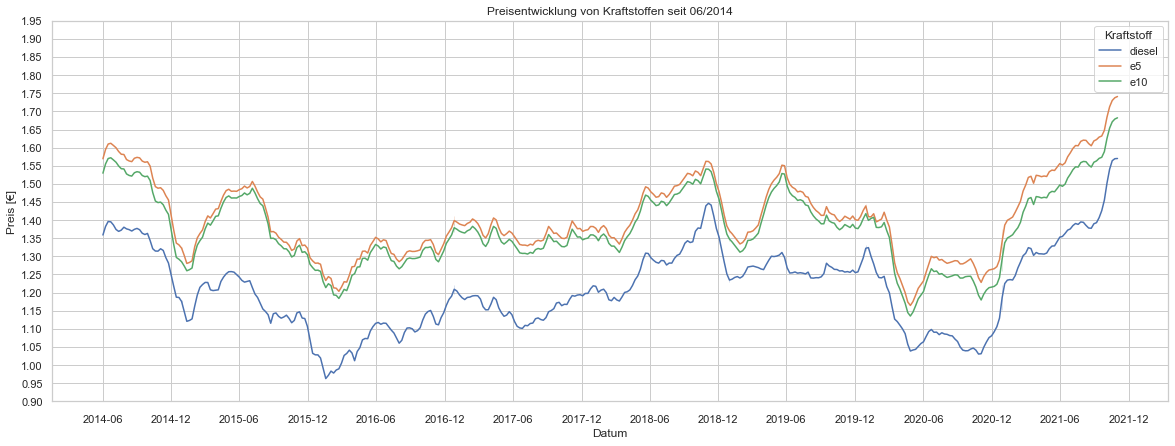

In [168]:
# prepare the figure
fig, ax = plt.subplots(figsize = (20, 7))

# set up the plot
#sns.set_theme(style="whitegrid")
sns.lineplot(ax = ax, x='date', y='value', hue='Kraftstoff', data=df_plot).set_title('Preisentwicklung von Kraftstoffen seit 06/2014')

plt.yticks(np.arange(0.9, 2, .05))

# specify the position of the major ticks at the beginning of the week
ax.xaxis.set_major_locator(md.MonthLocator(bymonth = [6,12], bymonthday=1, interval=1))
# specify the format of the labels as 'year-month-day'
ax.xaxis.set_major_formatter(md.DateFormatter('%Y-%m'))
# rotate the labels
plt.setp(ax.xaxis.get_majorticklabels(), rotation = 0)

# specify the position of the minor ticks at each day
ax.xaxis.set_minor_locator(md.MonthLocator(bymonth = [1,2,3,4,5,6,7,8,9,10,11,12], interval = 1))




# set ticks length
ax.tick_params(axis = 'x', which = 'major', length = 10)
ax.tick_params(axis = 'x', which = 'minor', length = 5)

# set axes labels
plt.xlabel('Datum')
plt.ylabel('Preis [€]')

# show the plot
plt.show()

#### Create dataframe containing `day of week` and `hour of day`

In [43]:
# Create a copy of the clean dataframe from above
df_p21_h = df_p_21.copy()

In [44]:
# Add day of week and hour of day columns
df_p21_h['day_of_week'] = df_p_21['date'].dt.day_name();
df_p21_h['hour_of_day'] = df_p_21['date'].dt.hour;

In [45]:
# show result
df_p21_h.head()

,date,station_uuid,diesel,e5,e10,day_of_week,hour_of_day
0,2021-03-13 00:01:11,a5190fae-f5a8-41a4-8970-68910beb0461,1.279,1.489,1.429,Saturday,0
1,2021-03-13 00:01:11,dc07a93b-8197-4613-b7de-24a5802f883c,1.349,1.549,1.489,Saturday,0
2,2021-03-13 00:01:11,4c08eb01-2d93-4ad9-988f-e57476799bc2,1.299,1.489,1.429,Saturday,0
3,2021-03-13 00:01:11,3e385667-56a9-46b4-96de-2adcfd7b5655,1.329,1.519,1.469,Saturday,0
4,2021-03-13 00:01:11,19db84db-090f-420f-a52e-e19f57517f7b,1.298,1.488,1.428,Saturday,0


In [171]:
# Melt dataframe in order to plot the data
df_plot = pd.melt(df_p21_h, id_vars=['day_of_week'], value_vars=['diesel', 'e5', 'e10'])
df_plot = df_plot.rename({'day_of_week': 'Wochentag', 'variable': 'Kraftstoff', 'value': 'Preis'}, axis=1) 
df_plot

,Wochentag,Kraftstoff,Preis
0,Saturday,diesel,1.279
1,Saturday,diesel,1.349
2,Saturday,diesel,1.299
3,Saturday,diesel,1.329
4,Saturday,diesel,1.298
...,...,...,...
268916347,Tuesday,e10,1.519
268916348,Tuesday,e10,1.489
268916349,Tuesday,e10,1.559
268916350,Tuesday,e10,1.519


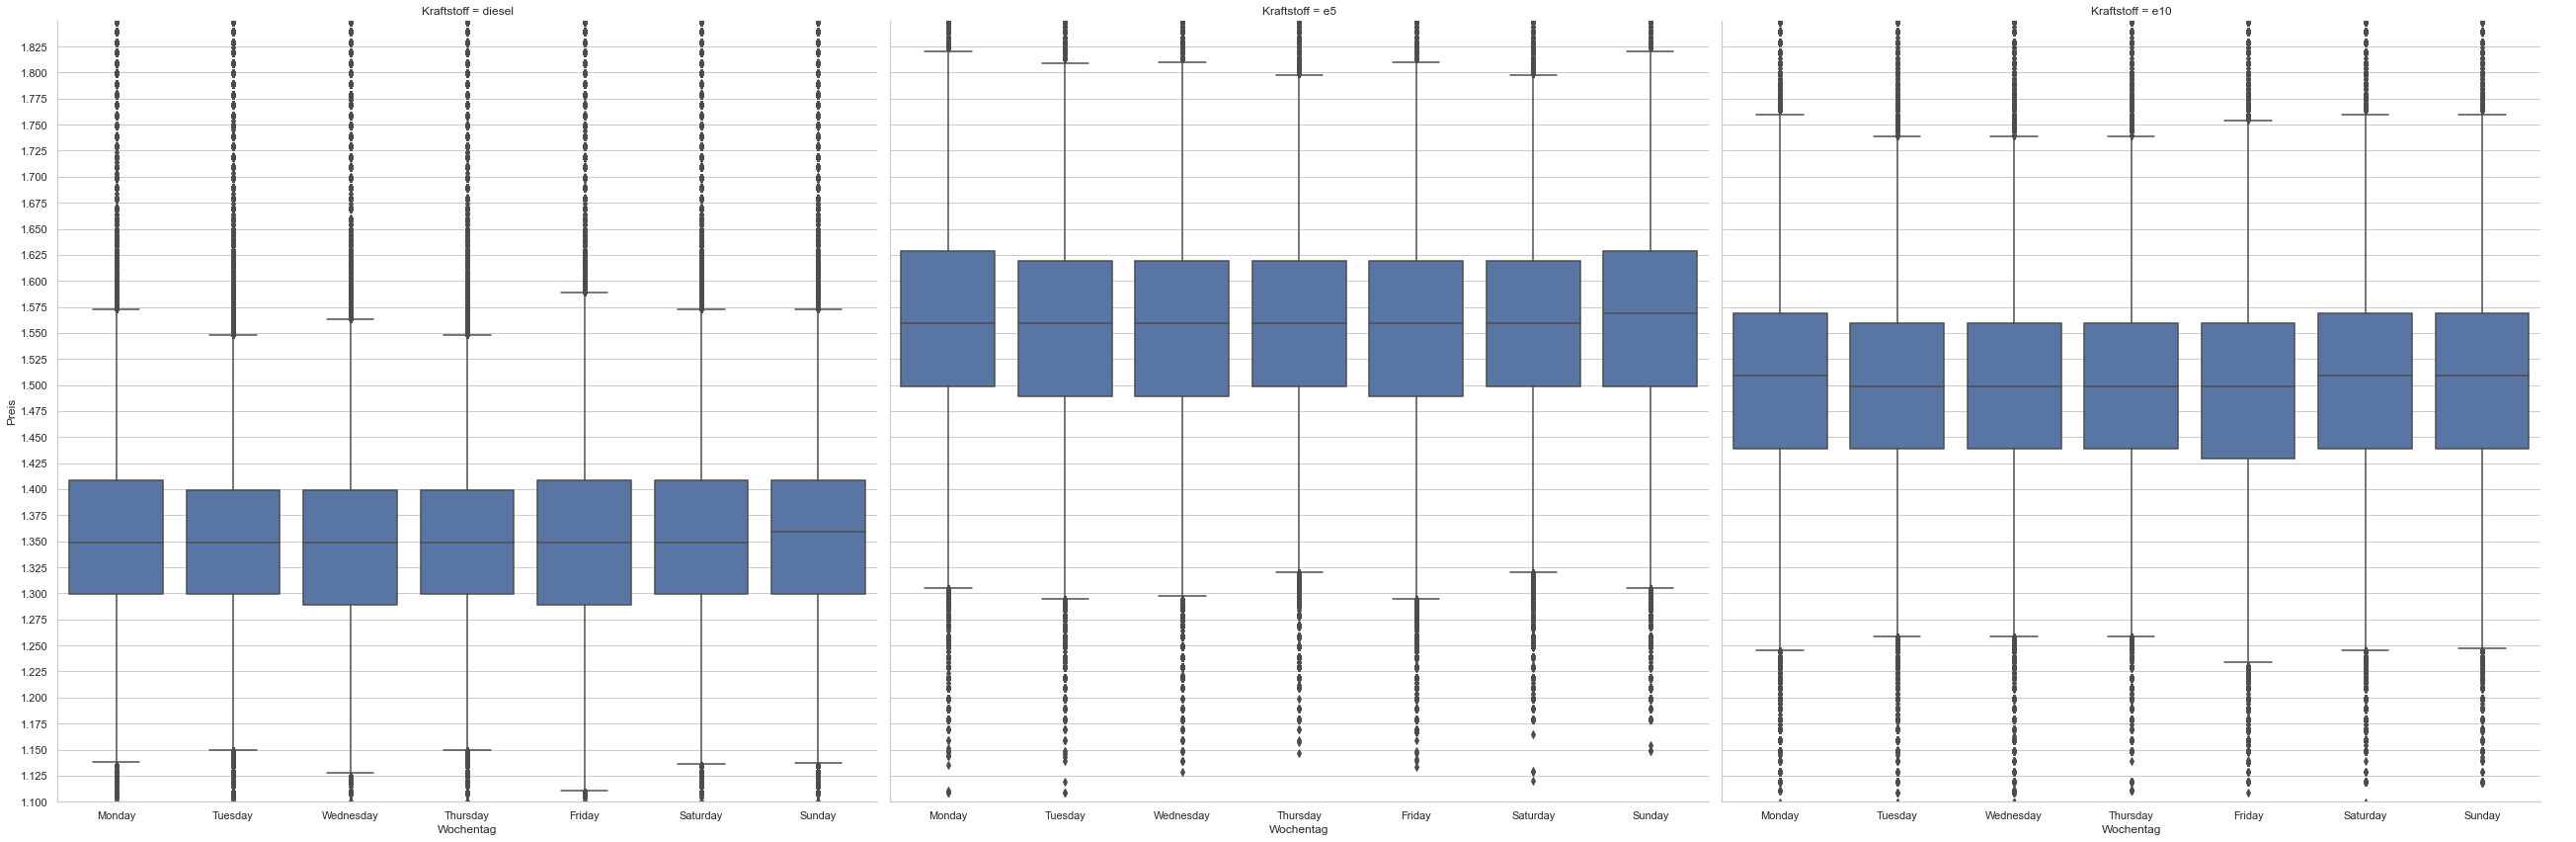

In [173]:
# Create boxplots for each type of fuel per day of week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
g = sns.FacetGrid(df_plot, col="Kraftstoff", height=12)
g.map(sns.boxplot, "Wochentag", "Preis", order=day_order)
g.set(ylim=(1.10, 1.85), yticks=np.arange(1.10, 1.85, .025))
g.add_legend()

In [175]:
# Have a dataframe with only diesel
df_plot = pd.melt(df_p21_h, id_vars=['day_of_week'], value_vars=['diesel'])
df_plot = df_plot.rename({'day_of_week': 'Wochentag', 'variable': 'Kraftstoff', 'value': 'Preis'}, axis=1) 
df_plot

,Wochentag,Kraftstoff,Preis
0,Saturday,diesel,1.279
1,Saturday,diesel,1.349
2,Saturday,diesel,1.299
3,Saturday,diesel,1.329
4,Saturday,diesel,1.298
...,...,...,...
89638779,Tuesday,diesel,1.339
89638780,Tuesday,diesel,1.349
89638781,Tuesday,diesel,1.389
89638782,Tuesday,diesel,1.369


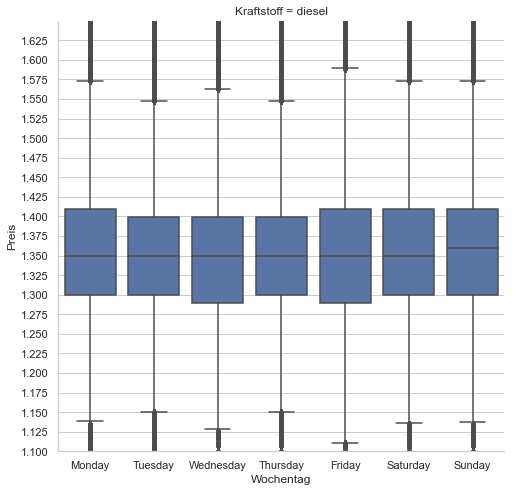

In [177]:
# Plot a boxplot for diesel prices per day of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
g = sns.FacetGrid(df_plot, col="Kraftstoff", height=7)
g.map(sns.boxplot, "Wochentag", "Preis", order=day_order)
g.set(ylim=(1.10, 1.65), yticks=np.arange(1.10, 1.65, .025))
g.add_legend()

##### Heatmap

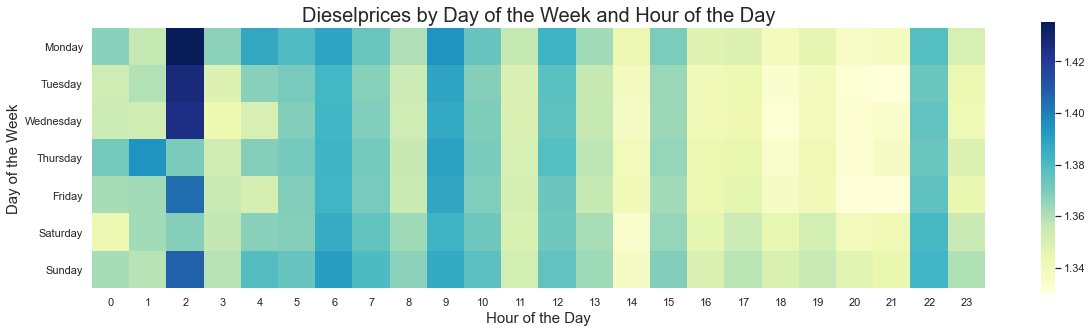

In [51]:
# Plot a heatmap including day of week hour of day for average diesel prices
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_p21_h.day_of_week = pd.Categorical(df_p21_h.day_of_week,categories=day_order)

df_heat = df_p21_h.groupby(['day_of_week','hour_of_day']).agg({'diesel':'mean'}).fillna(0).reset_index()
df_heat

df_heat = df_heat.pivot(index='day_of_week', columns='hour_of_day', values='diesel').fillna(0)
df_heat

f, ax = plt.subplots(figsize=(20, 5))
cmap = "YlGnBu"

monthly_sessions = sns.heatmap(df_heat, 
                    fmt="d", 
                    linewidths=0, 
                    ax=ax, 
                    cmap=cmap,
                    yticklabels=day_order,
                    square=True)

ax.axes.set_title("Dieselprices by Day of the Week and Hour of the Day",fontsize=20)
ax.set_xlabel("Hour of the Day",fontsize=15)
ax.set_ylabel("Day of the Week",fontsize=15)
plt.show()

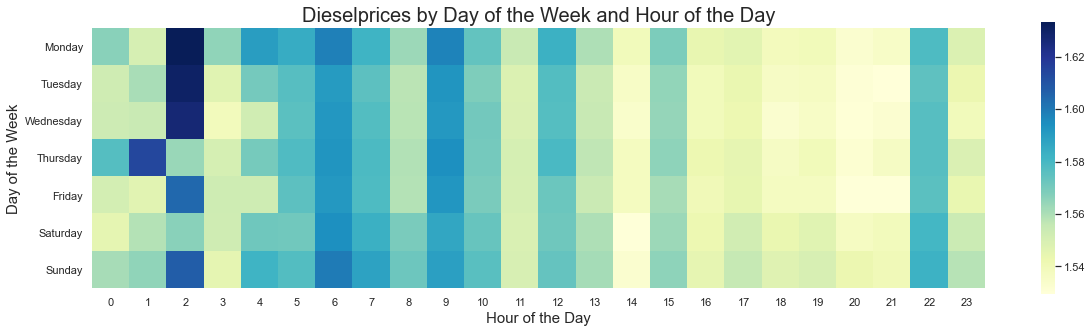

In [53]:
# Plot a heatmap including day of week hour of day for average e5 prices
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_p21_h.day_of_week = pd.Categorical(df_p21_h.day_of_week,categories=day_order)

df_heat = df_p21_h.groupby(['day_of_week','hour_of_day']).agg({'e5':'mean'}).fillna(0).reset_index()
df_heat

df_heat = df_heat.pivot(index='day_of_week', columns='hour_of_day', values='e5').fillna(0)
df_heat

f, ax = plt.subplots(figsize=(20, 5))
cmap = "YlGnBu"

monthly_sessions = sns.heatmap(df_heat, 
                    fmt="d", 
                    linewidths=0, 
                    ax=ax, 
                    cmap=cmap,
                    yticklabels=day_order,
                    square=True)

ax.axes.set_title("Dieselprices by Day of the Week and Hour of the Day",fontsize=20)
ax.set_xlabel("Hour of the Day",fontsize=15)
ax.set_ylabel("Day of the Week",fontsize=15)
plt.show()

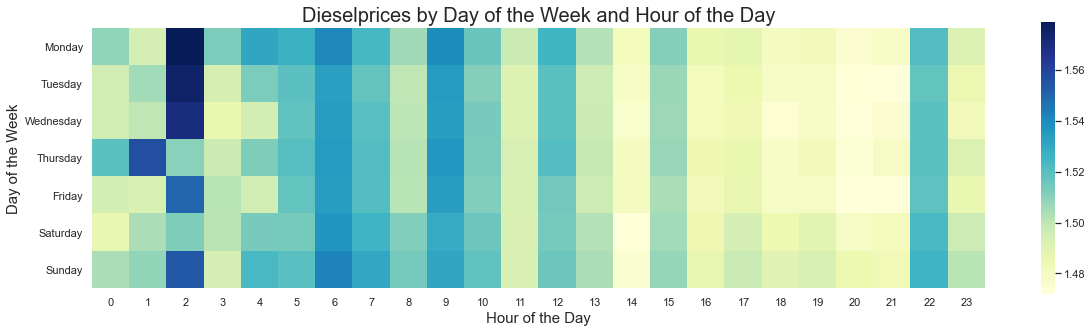

In [54]:
# Plot a heatmap including day of week hour of day for average e10 prices
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_p21_h.day_of_week = pd.Categorical(df_p21_h.day_of_week,categories=day_order)

df_heat = df_p21_h.groupby(['day_of_week','hour_of_day']).agg({'e10':'mean'}).fillna(0).reset_index()
df_heat

df_heat = df_heat.pivot(index='day_of_week', columns='hour_of_day', values='e10').fillna(0)
df_heat

f, ax = plt.subplots(figsize=(20, 5))
cmap = "YlGnBu"

monthly_sessions = sns.heatmap(df_heat, 
                    fmt="d", 
                    linewidths=0, 
                    ax=ax, 
                    cmap=cmap,
                    yticklabels=day_order,
                    square=True)

ax.axes.set_title("Dieselprices by Day of the Week and Hour of the Day",fontsize=20)
ax.set_xlabel("Hour of the Day",fontsize=15)
ax.set_ylabel("Day of the Week",fontsize=15)
plt.show()

#### Stations

> Create dataframe including all fuel stations for further examination

In [87]:
# Define the directory of the station files
path = os.path.expanduser("~/Documents/Udacity/Nanodegree DataScientist/Project1/gasprices/tankerkoenig-data/stations/**/**/")                     # use your path

# List of all .csv-files in the directory
all_files = glob.glob(os.path.join(path, "*.csv"))

# Create a separate dataframe for each .csv-file found in the directory given
df_from_each_file = (pd.read_csv(f) for f in all_files)

# Create a concatenated dataframe from all station dataframes above
df_stations = pd.concat(df_from_each_file, ignore_index=True)

In [88]:
# show result
df_stations.head()

,uuid,name,brand,street,house_number,post_code,city,latitude,longitude,first_active,openingtimes_json
0,0e18d0d3-ed38-4e7f-a18e-507a78ad901d,OIL! Tankstelle München,OIL!,Eversbuschstraße 33,NaN,80999,München,48.180700,11.460900,1970-01-01 01:00:00+01,"{""openingTimes"":[{""applicable_days"":63,""period..."
1,44e2bdb7-13e3-4156-8576-8326cdd20459,bft Tankstelle,NaN,Schellengasse,53,36304,Alsfeld,50.752010,9.279039,1970-01-01 01:00:00+01,"{""openingTimes"":[{""applicable_days"":63,""period..."
2,ad812258-94e7-473d-aa80-d392f7532218,bft Bonn-Bad Godesberg,bft,Godesberger Allee,55,53175,Bonn,50.695100,7.142760,1970-01-01 01:00:00+01,"{""openingTimes"":[{""applicable_days"":32,""period..."
3,005056ba-7cb6-1ed2-bceb-7c1c53a04d27,star Tankstelle,STAR,Clausthaler Straße,6,37444,Sankt Andreasberg,51.717040,10.522330,2014-03-18 16:45:31+01,"{""openingTimes"":[{""applicable_days"":127,""perio..."
4,e97d3ea3-2dc0-4aa6-bd25-3d930850cc07,Tankstelle Hiddenhausen,Hempelmann,Bünder Straße,184,32120,Hiddenhausen,52.148849,8.650332,2014-03-18 16:45:31+01,{}


In [ ]:
df_stations.info()

Cleaning steps:

- Drop columns `street`, `house_number`, `city`, `first_active`, `openingtimes_json` 
- Drop all duplicates based on `uuid` column

##### Define
Drop columns `street`, `house_number`, `city`, `first_active`, `openingtimes_json`

##### Code

In [89]:
# Drop columns out of the dataframe
df_stations.drop(['street', 'house_number', 'first_active', 'openingtimes_json', 'latitude', 'longitude'], 
              axis = 1, 
              inplace = True);

In [94]:
# Drop columns out of the dataframe
df_stations.drop(['city'], 
              axis = 1, 
              inplace = True);

##### Test

##### Define
Drop all duplicates based on `uuid` column

##### Code

In [90]:
df_stations.drop_duplicates(subset=['uuid'], keep='last', inplace=True)

##### Test

##### Define
Drop all non-numeric values out of `post_code` column

##### Code

In [91]:
df_stations = df_stations[df_stations['post_code'].astype('str').str.isnumeric()]

##### Test

##### Define
Drop all rows having `12345` or `00000` as value in `post_code`

##### Code

In [92]:
df_stations = df_stations.drop(df_stations[(df_stations['post_code'] == '12345') | 
                                           (df_stations['post_code'] == '00000')
                                          ].index);

##### Test

In [178]:
df_stations.head()

,uuid,name,brand,post_code
7558490,80204d8d-0d7b-4e55-aa82-446fa20b0292,"Eberhardt, Durmersheimer Straße, Elchesheim-Il...",Eberhardt,76477
7640525,19a91004-37c4-40ed-9d56-b6b8584b7edb,Aral Tankstelle,ARAL,49733
7755380,4be363d0-e453-4378-9714-cfe6dc3c7956,Tankstelle Daniela Rommel,AVIA,72270
7755381,5e533279-57a9-4873-9c40-fb353454a292,Engelmann Zöschen,Engelmann Zöschen,06237
7755382,eed1f8be-6ec6-7eb6-1cf7-688b969574e1,Globus Handelshof,NaN,65767


In [139]:
# Merge dataframes to have corresponding prices for each station for 2021
# merge df_stations with df_p_21
df_p21_station = pd.merge(
    left=df_stations, 
    right=df_p_21, 
    left_on='uuid',
    right_on='station_uuid',
    how='inner'
).drop(['station_uuid'], axis=1)

In [179]:
# show result
df_p21_station

,uuid,name,brand,post_code,date,diesel,e5,e10,plz2
0,80204d8d-0d7b-4e55-aa82-446fa20b0292,"Eberhardt, Durmersheimer Straße, Elchesheim-Il...",Eberhardt,76477,2021-10-29 11:22:09,1.519,1.709,1.649,76
1,80204d8d-0d7b-4e55-aa82-446fa20b0292,"Eberhardt, Durmersheimer Straße, Elchesheim-Il...",Eberhardt,76477,2021-10-29 11:33:13,1.509,1.669,1.609,76
2,80204d8d-0d7b-4e55-aa82-446fa20b0292,"Eberhardt, Durmersheimer Straße, Elchesheim-Il...",Eberhardt,76477,2021-10-29 11:35:11,1.529,1.699,1.639,76
3,80204d8d-0d7b-4e55-aa82-446fa20b0292,"Eberhardt, Durmersheimer Straße, Elchesheim-Il...",Eberhardt,76477,2021-10-29 11:42:09,1.519,1.689,1.629,76
4,80204d8d-0d7b-4e55-aa82-446fa20b0292,"Eberhardt, Durmersheimer Straße, Elchesheim-Il...",Eberhardt,76477,2021-10-29 12:21:08,1.519,1.699,1.639,76
...,...,...,...,...,...,...,...,...,...
89638363,e78e69f7-7e73-4fe9-a82d-ef73e7a3e38a,Tanken am Rott UG,Freie TS,42283,2021-06-29 13:40:09,1.349,1.559,1.509,42
89638364,e78e69f7-7e73-4fe9-a82d-ef73e7a3e38a,Tanken am Rott UG,Freie TS,42283,2021-06-29 14:35:07,1.339,1.539,1.499,42
89638365,e78e69f7-7e73-4fe9-a82d-ef73e7a3e38a,Tanken am Rott UG,Freie TS,42283,2021-06-29 15:55:06,1.359,1.569,1.529,42
89638366,e78e69f7-7e73-4fe9-a82d-ef73e7a3e38a,Tanken am Rott UG,Freie TS,42283,2021-06-29 16:41:06,1.309,1.529,1.489,42


In [141]:
# Add column with postal code region 
df_p21_station = df_p21_station \
    .assign(plz2 = lambda x: x['post_code'].str.slice(start=0, stop=2))

In [142]:
# Show result
df_p21_station.head()

,uuid,name,brand,post_code,date,diesel,e5,e10,plz2
0,80204d8d-0d7b-4e55-aa82-446fa20b0292,"Eberhardt, Durmersheimer Straße, Elchesheim-Il...",Eberhardt,76477,2021-10-29 11:22:09,1.519,1.709,1.649,76
1,80204d8d-0d7b-4e55-aa82-446fa20b0292,"Eberhardt, Durmersheimer Straße, Elchesheim-Il...",Eberhardt,76477,2021-10-29 11:33:13,1.509,1.669,1.609,76
2,80204d8d-0d7b-4e55-aa82-446fa20b0292,"Eberhardt, Durmersheimer Straße, Elchesheim-Il...",Eberhardt,76477,2021-10-29 11:35:11,1.529,1.699,1.639,76
3,80204d8d-0d7b-4e55-aa82-446fa20b0292,"Eberhardt, Durmersheimer Straße, Elchesheim-Il...",Eberhardt,76477,2021-10-29 11:42:09,1.519,1.689,1.629,76
4,80204d8d-0d7b-4e55-aa82-446fa20b0292,"Eberhardt, Durmersheimer Straße, Elchesheim-Il...",Eberhardt,76477,2021-10-29 12:21:08,1.519,1.699,1.639,76


In [146]:
# Create new dataframe with mean fuel prices grouped by postal code region
df_p21_2plz = df_p21_station.groupby(['plz2']).agg({'diesel': 'mean', 'e5': 'mean', 'e10': 'mean'}).reset_index()

In [147]:
# Show region
df_p21_2plz.head()

,plz2,diesel,e5,e10
0,01,1.347810,1.556292,1.497940
1,02,1.344705,1.544232,1.488875
2,03,1.356255,1.552007,1.495240
3,04,1.351072,1.555914,1.498234
4,06,1.361111,1.568755,1.511696


### Dataframes for Map

In [96]:
# read in shapefile for 2-digit zipcode
path = os.path.expanduser("~/Documents/Udacity/Nanodegree DataScientist/Project1/gasprices/tankerkoenig-data/plz-2stellig.shp")

df_plz_shape = gpd.read_file(path, dtype={'plz': str})

In [97]:
# show result
df_plz_shape.head()

,plz,geometry
0,01,"POLYGON ((13.59863 50.77381, 13.59932 50.77418..."
1,02,"POLYGON ((14.79051 50.82403, 14.79039 50.82396..."
2,03,"POLYGON ((13.89033 51.63077, 13.89018 51.62974..."
3,04,"POLYGON ((12.18567 51.36449, 12.18813 51.36445..."
4,04,"POLYGON ((12.19058 51.36444, 12.19154 51.36442..."


In [148]:
# merge df_plz_shape with df_p21_2plz
df_p21_2plz = pd.merge(
    left=df_plz_shape, 
    right=df_p21_2plz, 
    left_on='plz',
    right_on='plz2',
    how='inner'
).drop(['plz2'], axis=1)

In [150]:
# show result
df_p21_2plz.head()

,plz,geometry,diesel,e5,e10
0,01,"POLYGON ((13.59863 50.77381, 13.59932 50.77418...",1.347810,1.556292,1.497940
1,02,"POLYGON ((14.79051 50.82403, 14.79039 50.82396...",1.344705,1.544232,1.488875
2,03,"POLYGON ((13.89033 51.63077, 13.89018 51.62974...",1.356255,1.552007,1.495240
3,04,"POLYGON ((12.18567 51.36449, 12.18813 51.36445...",1.351072,1.555914,1.498234
4,04,"POLYGON ((12.19058 51.36444, 12.19154 51.36442...",1.351072,1.555914,1.498234


/Users/u737973/opt/anaconda3/lib/python3.8/site-packages/descartes/patch.py:63: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  concatenate([asarray(t.exterior)[:, :2]] +
/Users/u737973/opt/anaconda3/lib/python3.8/site-packages/descartes/patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])


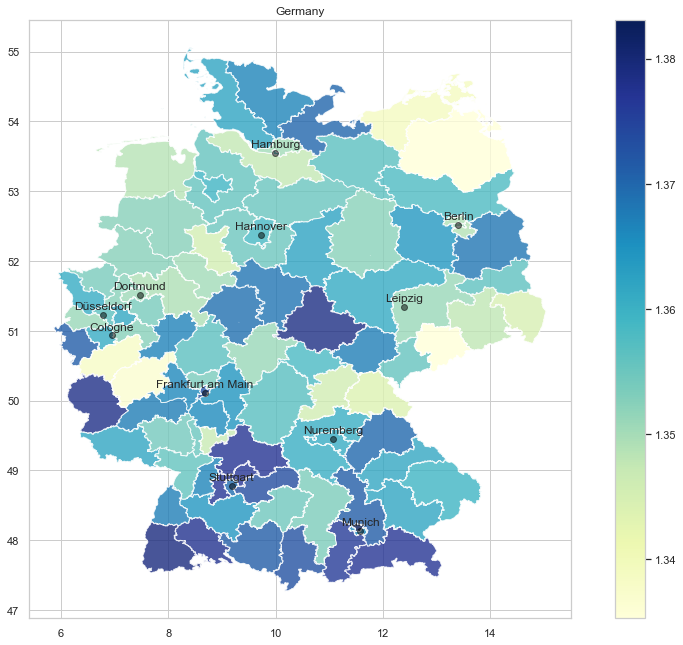

In [154]:
# Plot map with biggest cities of germany
# Plot post code regions
# Plot colour tone corresponding to mean price

plt.rcParams['figure.figsize'] = [16, 11]

# Get lat and lng of Germany's main cities. 
top_cities = {
    'Berlin': (13.404954, 52.520008), 
    'Cologne': (6.953101, 50.935173),
    'Düsseldorf': (6.782048, 51.227144),
    'Frankfurt am Main': (8.682127, 50.110924),
    'Hamburg': (9.993682, 53.551086),
    'Leipzig': (12.387772, 51.343479),
    'Munich': (11.576124, 48.137154),
    'Dortmund': (7.468554, 51.513400),
    'Stuttgart': (9.181332, 48.777128),
    'Nuremberg': (11.077438, 49.449820),
    'Hannover': (9.73322, 52.37052)
}

fig, ax = plt.subplots()

df_p21_2plz.plot(
    ax=ax, 
    column='diesel', 
    categorical=False, 
    legend=True, 
    cmap='YlGnBu',
    alpha=0.8
)


# Plot cities. 
for c in top_cities.keys():
    # Plot city name.
    ax.text(
        x=top_cities[c][0], 
        # Add small shift to avoid overlap with point.
        y=top_cities[c][1] + 0.08, 
        s=c, 
        fontsize=12,
        ha='center', 
    )
    # Plot city location centroid.
    ax.plot(
        top_cities[c][0], 
        top_cities[c][1], 
        marker='o',
        c='black', 
        alpha=0.5
    )

ax.set(
    title='Germany', 
    aspect=1.3, 
    facecolor='white'
);

/Users/u737973/opt/anaconda3/lib/python3.8/site-packages/descartes/patch.py:63: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  concatenate([asarray(t.exterior)[:, :2]] +
/Users/u737973/opt/anaconda3/lib/python3.8/site-packages/descartes/patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])


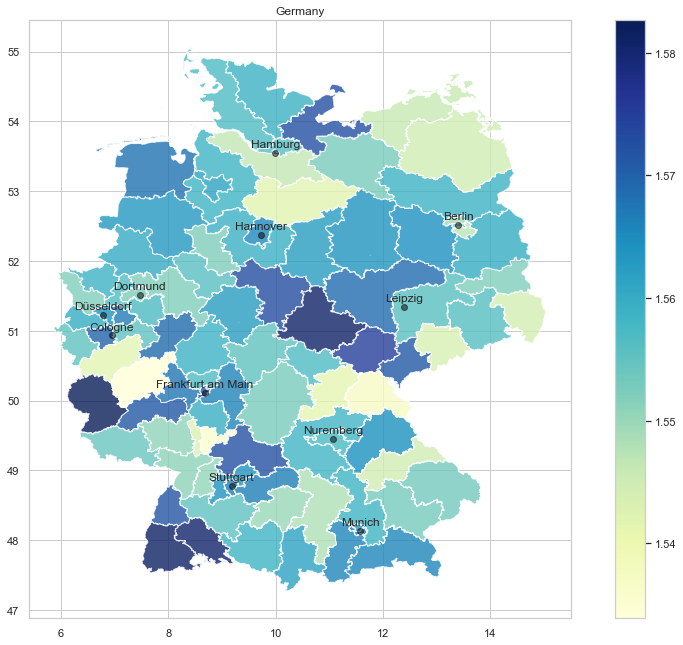

In [155]:
# Plot map with biggest cities of germany
# Plot post code regions
# Plot colour tone corresponding to mean price

plt.rcParams['figure.figsize'] = [16, 11]

# Get lat and lng of Germany's main cities. 
top_cities = {
    'Berlin': (13.404954, 52.520008), 
    'Cologne': (6.953101, 50.935173),
    'Düsseldorf': (6.782048, 51.227144),
    'Frankfurt am Main': (8.682127, 50.110924),
    'Hamburg': (9.993682, 53.551086),
    'Leipzig': (12.387772, 51.343479),
    'Munich': (11.576124, 48.137154),
    'Dortmund': (7.468554, 51.513400),
    'Stuttgart': (9.181332, 48.777128),
    'Nuremberg': (11.077438, 49.449820),
    'Hannover': (9.73322, 52.37052)
}

fig, ax = plt.subplots()

df_p21_2plz.plot(
    ax=ax, 
    column='e5', 
    categorical=False, 
    legend=True, 
    cmap='YlGnBu',
    alpha=0.8
)


# Plot cities. 
for c in top_cities.keys():
    # Plot city name.
    ax.text(
        x=top_cities[c][0], 
        # Add small shift to avoid overlap with point.
        y=top_cities[c][1] + 0.08, 
        s=c, 
        fontsize=12,
        ha='center', 
    )
    # Plot city location centroid.
    ax.plot(
        top_cities[c][0], 
        top_cities[c][1], 
        marker='o',
        c='black', 
        alpha=0.5
    )

ax.set(
    title='Germany', 
    aspect=1.3, 
    facecolor='white'
);

/Users/u737973/opt/anaconda3/lib/python3.8/site-packages/descartes/patch.py:63: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  concatenate([asarray(t.exterior)[:, :2]] +
/Users/u737973/opt/anaconda3/lib/python3.8/site-packages/descartes/patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])


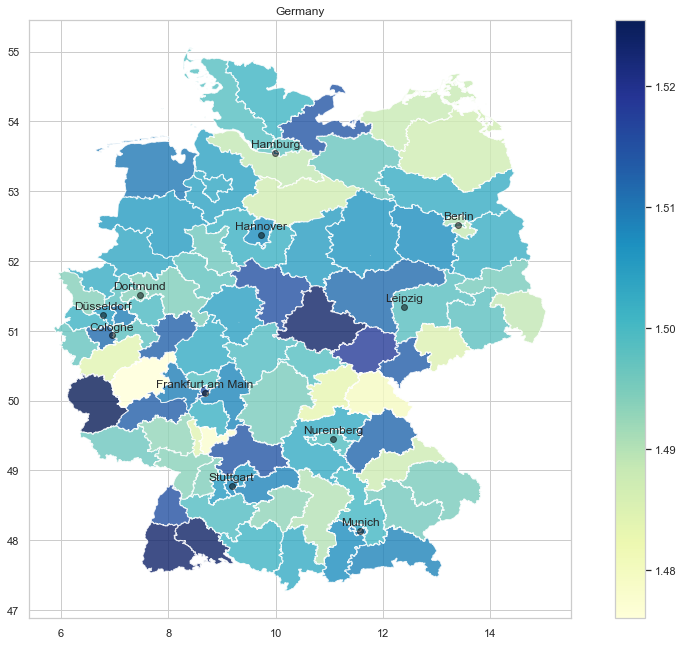

In [156]:
# Plot map with biggest cities of germany
# Plot post code regions
# Plot colour tone corresponding to mean price

plt.rcParams['figure.figsize'] = [16, 11]

# Get lat and lng of Germany's main cities. 
top_cities = {
    'Berlin': (13.404954, 52.520008), 
    'Cologne': (6.953101, 50.935173),
    'Düsseldorf': (6.782048, 51.227144),
    'Frankfurt am Main': (8.682127, 50.110924),
    'Hamburg': (9.993682, 53.551086),
    'Leipzig': (12.387772, 51.343479),
    'Munich': (11.576124, 48.137154),
    'Dortmund': (7.468554, 51.513400),
    'Stuttgart': (9.181332, 48.777128),
    'Nuremberg': (11.077438, 49.449820),
    'Hannover': (9.73322, 52.37052)
}

fig, ax = plt.subplots()

df_p21_2plz.plot(
    ax=ax, 
    column='e10', 
    categorical=False, 
    legend=True, 
    cmap='YlGnBu',
    alpha=0.8
)


# Plot cities. 
for c in top_cities.keys():
    # Plot city name.
    ax.text(
        x=top_cities[c][0], 
        # Add small shift to avoid overlap with point.
        y=top_cities[c][1] + 0.08, 
        s=c, 
        fontsize=12,
        ha='center', 
    )
    # Plot city location centroid.
    ax.plot(
        top_cities[c][0], 
        top_cities[c][1], 
        marker='o',
        c='black', 
        alpha=0.5
    )

ax.set(
    title='Germany', 
    aspect=1.3, 
    facecolor='white'
);